目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

In [5]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得鳶尾花資料集
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


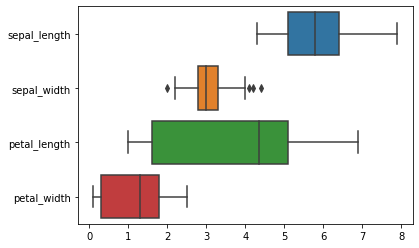

In [7]:
# 直接使用PANDAS dataframe, 當作參數
# 箱形圖顯示了數據的總體分布，同時繪製了異常值的數據點。這個物理點讓它們的特定值在樣本之間容易被識別和比較。
# 數據中的任何異常值都繪製為單個點。

sns.boxplot(data = df, orient = "h")
plt.show()

# 分布的擴散差不多是相等的，並且可以很容易地比較異常值


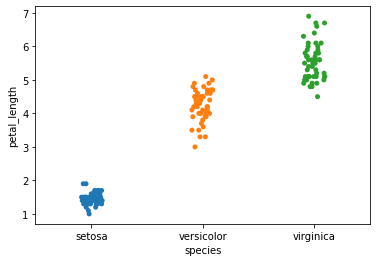

In [12]:
# 當一個或兩個正在研究的變數是分類的時,我們使用像條帶線()、swarmplot()等的圖。
# 查看到每個物種petal_length的差異。但是,散點圖的主要問題是散點圖上的點重疊
sns.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

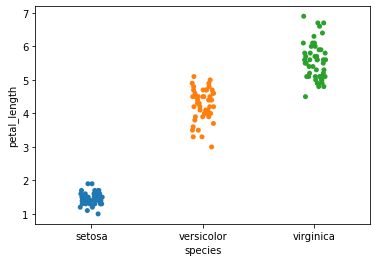

In [13]:
# 上述散點圖的主要問題是散點圖上的點重疊。我們使用"抖動"參數來處理此類方案。
# 抖動會為數據添加一些隨機雜訊。此參數將沿分類軸調整位置。
sns.stripplot(x = "species", y = "petal_length", data = df, jitter=True)
plt.show()

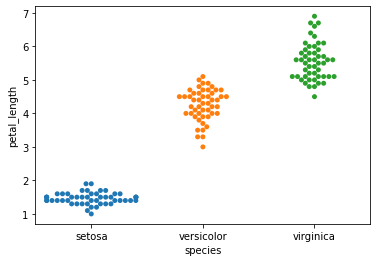

In [14]:
#另一個可以用作「抖動」 的替代選項是函數群圖()。
#此函數將散點圖的每個點都放在分類軸上,從而避免重疊點 
sns.swarmplot(x = "species", y = "petal_length", data = df)
plt.show()

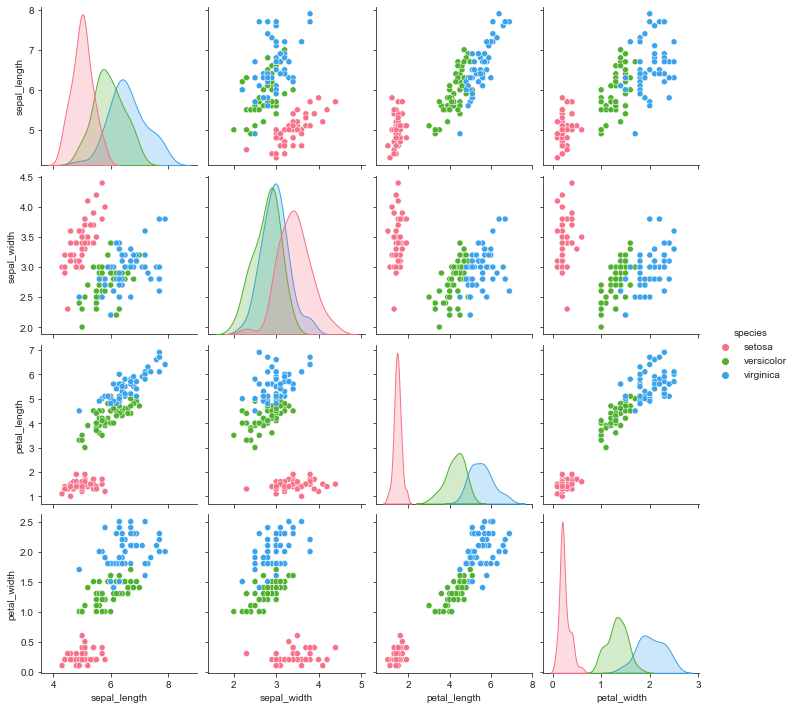

In [15]:
# 可以觀察每個情節的變化。繪圖採用矩陣格式,其中行名表示 x 軸,列名稱表示 y 軸。
# 對角線圖是內核密度圖,其中其他圖是散點圖
# 就是hue在sns.pairplot函數調用中使用關鍵字：

sns.set_style("ticks") #STYLE初始化
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

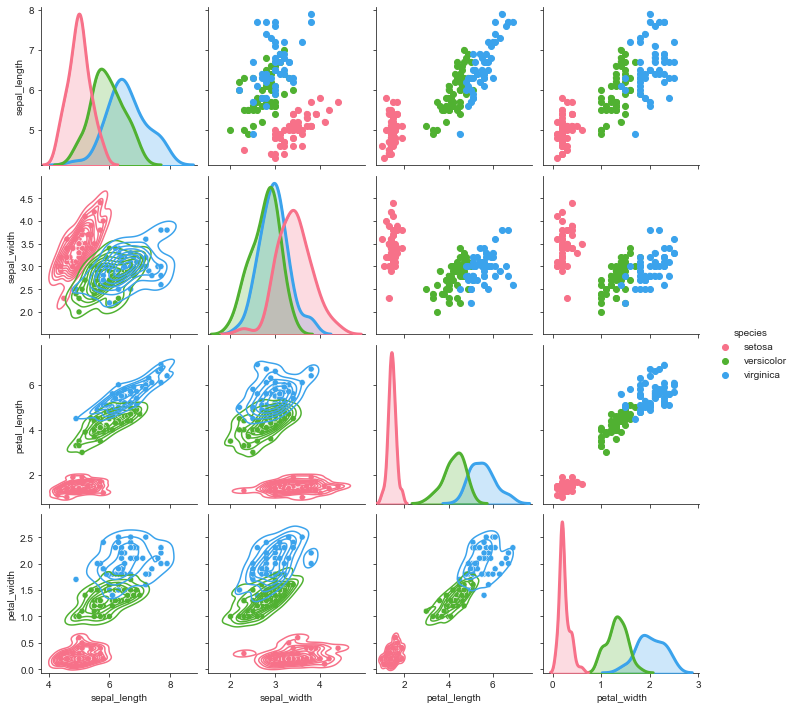

In [16]:
# 可以在上三角形和下三角形使用不同的函數來查看關係的不同方面
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_diag(sns.kdeplot, lw = 3, legend = False);
plt.show()